In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [83]:
df = pd.read_csv('data/yearly_avg.csv')
df = df.drop(columns=['avg_home_team_score', 'avg_visitor_team_score'])
df.head()

,season,avg_fgm,avg_fga,avg_fg3m,avg_fg3a,avg_ftm,avg_fta,avg_reb,avg_ast,avg_stl,avg_blk,avg_turnover,avg_pf,avg_pts
0,1976,4.257199,8.997956,0.000000,0.000000,2.068930,2.755754,4.640376,2.333376,0.624525,0.360231,0.000000,2.459594,10.583328
1,1977,4.454656,9.389800,0.000000,0.000000,2.182881,2.904846,4.810101,2.520091,0.685234,0.391145,1.039477,2.538970,11.092192
2,1978,4.524852,9.215290,0.000000,0.000000,2.165014,2.879851,4.576468,2.572625,0.713458,0.440749,1.289864,2.541427,11.214718
3,1979,4.463449,9.121768,0.080546,0.245035,2.166024,2.834357,4.557572,2.608842,0.702636,0.445408,1.251169,2.442994,11.173468
4,1980,4.363442,8.935875,0.050254,0.176886,2.197172,2.928089,4.408784,2.558081,0.646734,0.460128,1.263468,2.531706,10.974309


In [92]:
def perform_pca_and_plot(n_components):
    # Standardize the features
    features = df.drop(columns=['season'])
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Apply PCA with the specified number of components
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(scaled_features)

    # Calculate the explained variance ratio
    explained_variance = pca.explained_variance_ratio_

    # Create a DataFrame with the principal components
    pca_columns = [f'PC{i+1}' for i in range(n_components)]
    pca_df = pd.DataFrame(data=principal_components, columns=pca_columns)
    pca_df['season'] = df['season']

    # Plot the results
    if n_components == 2:
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['season'], cmap='viridis')
        plt.colorbar(scatter, label='Year')
        plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}%)')
        plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}%)')
        plt.title('PCA of Yearly Averages (2 Components)')
        for i, txt in enumerate(pca_df['season']):
            plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]))
        plt.grid(True)
        plt.show()
    elif n_components == 3:
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['season'], cmap='viridis')
        fig.colorbar(scatter, label='Season')
        ax.set_xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}%)')
        ax.set_ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}%)')
        ax.set_zlabel(f'Principal Component 3 ({explained_variance[2]*100:.2f}%)')
        ax.set_title('PCA of Yearly Averages (3 Components)')
        for i, txt in enumerate(pca_df['season']):
            ax.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['PC3'][i], txt)
        plt.show()
    else:
        print("Plotting is only supported for 2 or 3 components.")

    return pca_df
    print("Loadings:")
    print(loading_df)

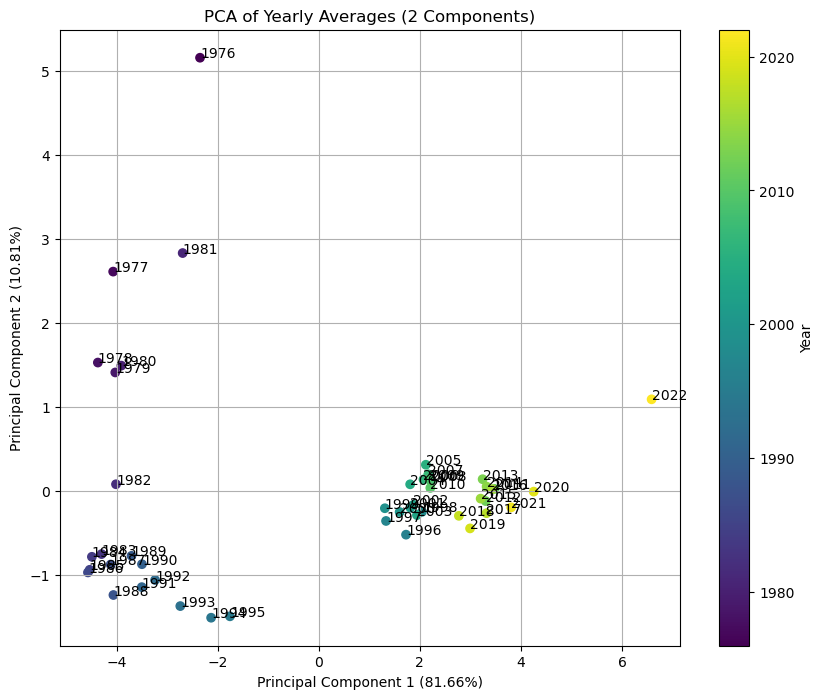

In [93]:
pca_df = perform_pca_and_plot(2)

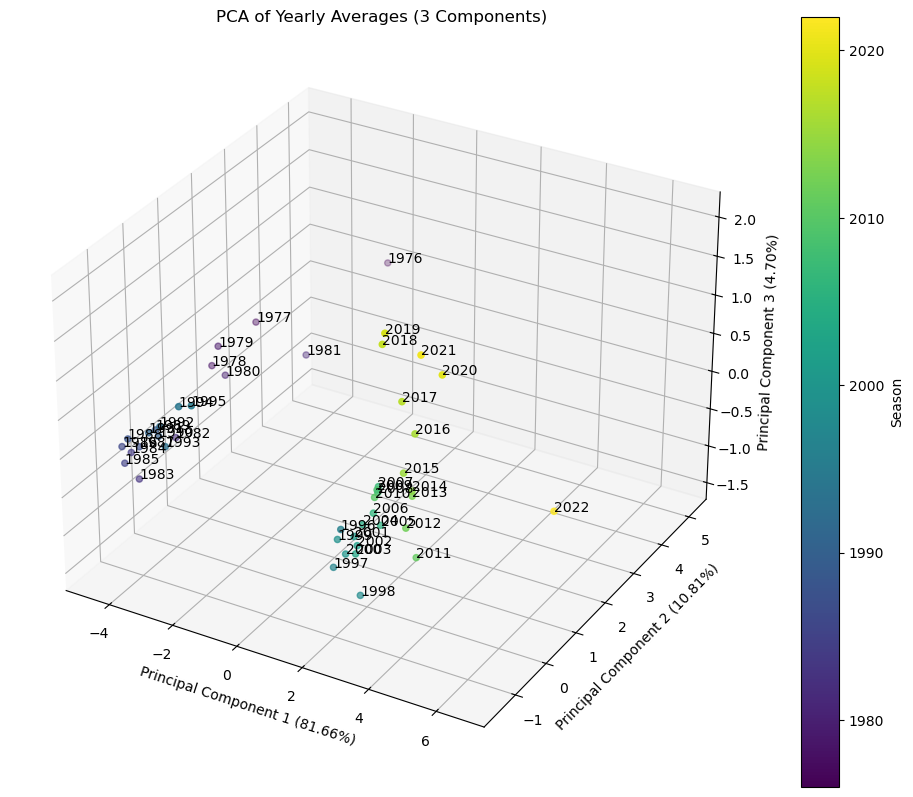

,PC1,PC2,PC3,season
0,-2.351525,5.158355,0.472291,1976
1,-4.070704,2.611402,0.334340,1977
2,-4.373672,1.528407,0.093679,1978
3,-4.028813,1.410618,0.430936,1979
4,-3.909137,1.491958,0.035803,1980
5,-2.695102,2.832386,-0.015763,1981
6,-4.014665,0.079228,-0.297424,1982
7,-4.300231,-0.752143,-0.575516,1983
8,-4.491797,-0.784775,-0.239081,1984
9,-4.535669,-0.939584,-0.328596,1985


In [94]:
perform_pca_and_plot(3)

In [106]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=44, n_init=1000).fit(pca_df)

clustered = loadings_2d.assign(cluster=kmeans.labels_)
clustered.head()

,PC1,PC2,season,cluster
0,-2.351525,5.158355,1976,2
1,-4.070704,2.611402,1977,2
2,-4.373672,1.528407,1978,2
3,-4.028813,1.410618,1979,2
4,-3.909137,1.491958,1980,2


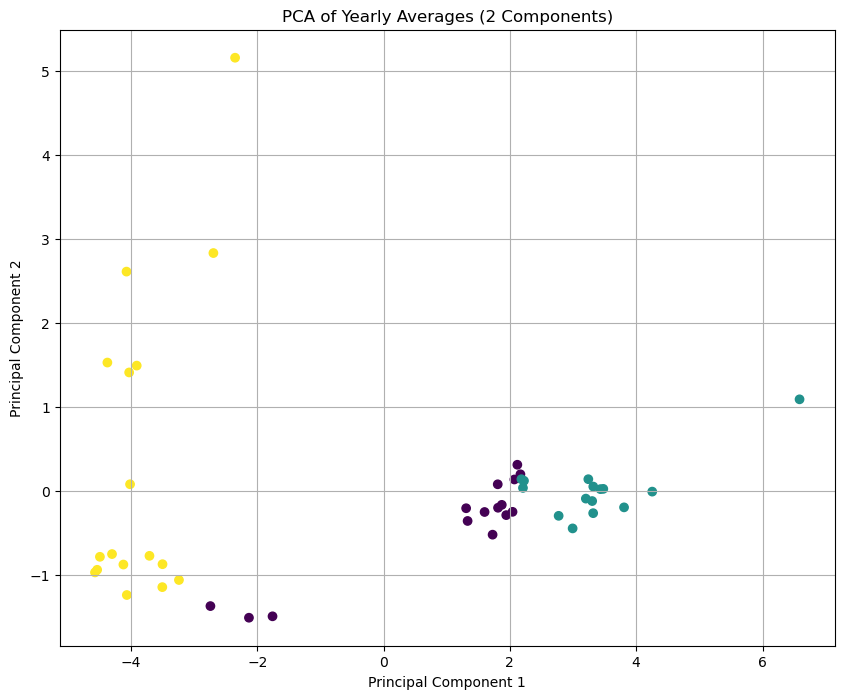

In [107]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(clustered['PC1'], clustered['PC2'], c=clustered['cluster'], cmap='viridis')
plt.xlabel(f'Principal Component 1')
plt.ylabel(f'Principal Component 2')
plt.title('PCA of Yearly Averages (2 Components)')
plt.grid(True)
plt.show()